# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

In [2]:
y.shape

torch.Size([50, 1])

In [0]:
## hypothesis computes $h_theta$

def hypothesis(theta, X):
    # YOUR CODE HERE
    return X @ theta
    #raise NotImplementedError()

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    M = X.shape[0]
    grad =  (1/M) * X.t() @ (X @ theta - y) 
    return grad
    #raise NotImplementedError()

## cost_func computes the cost function J
def cost_func(theta, X, y): 
    # YOUR CODE HERE
    M = X.shape[0]
    h = hypothesis(theta, X)
    diff = h-y
    cost = (diff**2).sum(0)
    cost = cost/(2*M)
    return cost 
    #raise NotImplementedError()

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

In [0]:
## The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(count, X, y, alpha, beta_1, beta_2, theta,db,dw):
  Vdw = torch.tensor(1)
  Vdb = torch.tensor(1)
  Sdw = torch.tensor(1)
  Sdb = torch.tensor(1)
  
  # YOUR CODE HERE
  epsilon = 1**-7

  if count == 1:
    
    Vdw = 0
    Sdw = 0
    Vdb = 0
    Sdb = 0
    
  #db,dw = grad_cost_func(theta, X, y)
  Vdw = beta_1 * Vdw + (1-beta_1) * dw
  Vdb = beta_1 * Vdb + (1-beta_1) * db

  Sdw = beta_2 * Sdw + (1-beta_2) * dw * dw
  Sdb = beta_2 * Sdb + (1-beta_2) * db * db

  Vdw_c = Vdw/(1-beta_1**count)
  Vdb_c = Vdb/(1-beta_1**count)

  Sdw_c = Sdw/(1-beta_2**count)
  Sdb_c = Sdb/(1-beta_2**count)

  theta[0] = theta[0] - alpha * (Vdb_c/torch.sqrt(Sdb_c+epsilon))
  theta[1] = theta[1] - alpha * (Vdw_c/torch.sqrt(Sdw_c+epsilon))

  return theta
      
  #raise NotImplementedError()

In [0]:
## The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(count,theta, X, y, beta_1,db,dw, alpha):
  Vdw = torch.tensor(1)
  Vdb = torch.tensor(1)
    # YOUR CODE HERE
  if count == 1:
    
    Vdw = 0
    Vdb = 0 
      
  #db,dw = grad_cost_func(theta, X, y)
  Vdw = beta_1 * Vdw + (1-beta_1) * dw
  Vdb = beta_1 * Vdb + (1-beta_1) * db
      
  #Vdw_c = Vdw/(1-beta_1**count)
  #Vdb_c = Vdb/(1-beta_1**count)
      
  theta[0] = theta[0] - alpha * Vdb#Vdb_c
  theta[1] = theta[1] - alpha * Vdw#Vdw_c
      
  return theta
  
    #raise NotImplementedError()

In [0]:
## The weight updated computed using SGD
def weigthupdate_sgd(count, X, y, alpha,theta,db,dw):
  # YOUR CODE HERE
  #db,dw = grad_cost_func(theta, X, y)
  theta[0] = theta[0] - alpha * db
  theta[1] = theta[1] - alpha * dw
   
  return theta
  #raise NotImplementedError()

In [0]:
N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.1


**STOCHASTIC GRADIENT DESCENT**

In [0]:
theta_sg_hist = torch.Tensor(M * N - M , 2)
count = 0
theta_sg = torch.Tensor([[-2],[2]]) #initialise
dwsg = torch.tensor(1)
dbsg = torch.tensor(1)


In [0]:
for j in range(1,N):
 
  for i in range(0,M):
 
    x = X[i,:].reshape(1,2)
    
    dbsg,dwsg = grad_cost_func(theta_sg, x, y[i])
    
    theta_sg = weigthupdate_sgd(j, x, y[i], alpha, theta_sg, dbsg, dwsg)
 
    theta_sg_hist[count][0] = theta_sg[0]
    theta_sg_hist[count][1] = theta_sg[1] 
    count = count + 1
    

**GRADIENT DESCENT WITH MOMENTUM**

In [0]:
theta_m_hist = torch.Tensor(M * N - M , 2)
count = 0
theta_m = torch.Tensor([[-2],[2]]) #initialise
dwm = torch.tensor(1)
dbm = torch.tensor(1)

In [0]:
for j in range(1,N):
 
  for i in range(0,M):
 
    x = X[i,:].reshape(1,2)
    
    dbm,dwm = grad_cost_func(theta_m, x, y[i])
    
    theta_m = weightupdate_sgd_momentum(j,theta_m, x, y[i], beta_1, dbm, dwm, alpha)
 
    theta_m_hist[count][0] = theta_m[0]
    theta_m_hist[count][1] = theta_m[1] 
    count = count + 1

**ADAM OPTIMIZATION**

In [0]:
theta_ad_hist = torch.Tensor(M * N - M , 2)
count = 0
theta_ad = torch.Tensor([[-2],[2]]) #initialise
dwad = torch.tensor(1)
dbad = torch.tensor(1)

In [0]:
for j in range(1,N):
 
  for i in range(0,M):

    x = X[i,:].reshape(1,2)
    
    dbad,dwad = grad_cost_func(theta_ad, x, y[i])
    
    theta_ad = weightupdate_adam(j, x, y[i], alpha, beta_1, beta_2, theta_ad, dbad, dwad)
    
    theta_ad_hist[count][0] = theta_ad[0]
    theta_ad_hist[count][1] = theta_ad[1] 
    count = count + 1

**CONTOUR PLOTS FOR COMPARISON OF DESCENT**

In [0]:
theta_0_vals = np.linspace(-2,4,100)  #(100,)
theta_1_vals = np.linspace(0,4,100)   #(100,)
theta = torch.Tensor(len(theta_0_vals),2)   #(100,2)

In [0]:
J = torch.Tensor(len(theta_0_vals),len(theta_0_vals))
th = torch.Tensor(2,1)


In [0]:
# Compute the value of the cost function, J, over all the thetas in order to plot the contour below.
# YOUR CODE HERE

for i in range(len(theta_0_vals)):
  for j in range(len(theta_1_vals)):
    th[0] = theta_0_vals[i]
    th[1] = theta_1_vals[j]
    
    J[i,j] = cost_func(th, X, y)
  
#raise NotImplementedError()


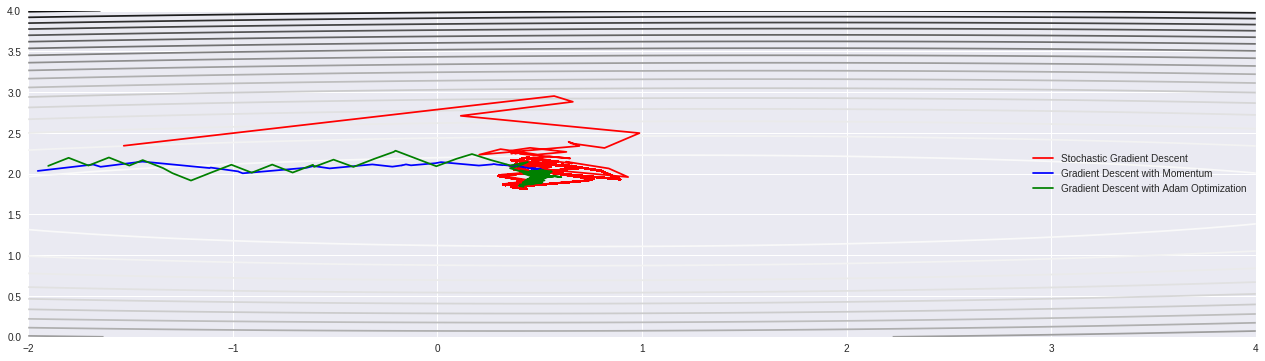

In [24]:

xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
plt.figure(figsize=(22,6))

plt.plot(theta_sg_hist[:,0].numpy(),theta_sg_hist[:,1].numpy(),c='r',label = 'Stochastic Gradient Descent')
plt.plot(theta_m_hist[:,0].numpy(),theta_m_hist[:,1].numpy(),c='b',label = 'Gradient Descent with Momentum')
plt.plot(theta_ad_hist[:,0].numpy(),theta_ad_hist[:,1].numpy(),c='g',label = 'Gradient Descent with Adam Optimization')
contours = plt.contour(xc, yc, J, 20)
plt.legend(loc ='center right')


In [0]:
# Now plot the output of SGD, momentum and Adam all on the same plot for comparison
# YOUR CODE HERE
#raise NotImplementedError()